In [217]:
# Turns off unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [219]:
# We give dataset to df variable

df = pd.read_csv("data/Car_Price_Prediction.csv")

In [220]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


#### Feature Engineering

In [221]:
df_copy = df.copy()

In [222]:
# We do proper encoding the data for machine learning models to work productively. Because machine learnig models cannot work with cathegorci values.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_copy["Fuel Type"] = label_encoder.fit_transform(df_copy["Fuel Type"])
# Petrol = 2, Electric = 1, Diesel = 0

df_copy["Transmission"] = label_encoder.fit_transform(df_copy["Transmission"])
# Manuel = 1, Automatic = 0

df_copy["Model"] = label_encoder.fit_transform(df_copy["Model"])
# Model B = 1, Model C = 2, Model D = 3, Model A = 4, Model E = 0

df_copy["Make"] = label_encoder.fit_transform(df_copy["Make"])
# Audi = 0, BMW = 1, Ford = 2, Honda = 3, Toyota=4, 


In [223]:
df_copy

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657
...,...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1,22765.597091
996,3,1,2020,3.1,149112,0,1,30392.575567
997,2,2,2008,1.9,195387,2,0,16446.892292
998,4,0,2003,4.4,246,2,0,27396.156708


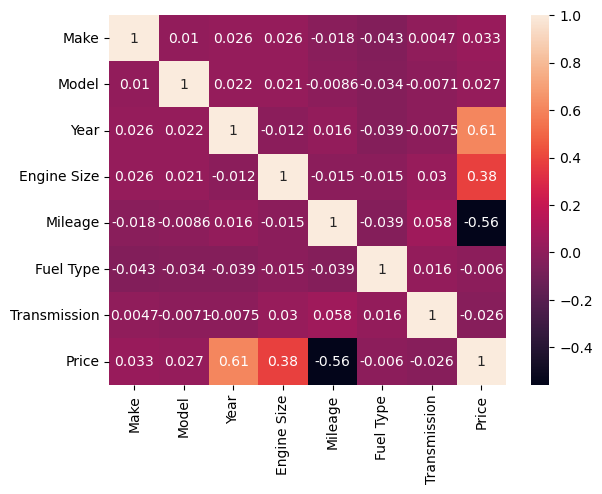

In [224]:
# We are trying to discover the columns that affect the price value

sns.heatmap(df_copy.corr(), annot=True)
plt.show()

#### Preparing For Machine Learning Models

In [225]:
X = df_copy.drop(columns="Price", axis=1)
y = df_copy["Price"]

In [226]:
# We split the dataset for training and testing values with train_test_split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)

In [227]:
# We apply scaling to X_train and X_test data for healthy for model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit() -> learn, transform() -> apply
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model

In [228]:
# Using pipeline in this piece of code allows us to apply multiple models simultaneously. 
# This simplifies the code and increases its readability.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()

    pipeline = Pipeline([
        ("standart_scaler", scaler),
        ("poly_features", poly_features), 
        ("lin_reg", lin_reg)
        ])
    
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 Score: ", score)

    y_pred_new = pipeline.predict(X_train_scaled)

In [ ]:
# With this code we give many degrees to the polynomial model

for degree in range(1,5):
    poly_regression(degree)

R2 Score:  0.8561412846732342
R2 Score:  0.850365004326928
R2 Score:  0.8179197720228442
R2 Score:  0.7552045059169199


#### Lasso, Ridge and ElasticNet

In [230]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score

models = {
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet()
}

def apply_model(models):
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = r2_score(y_test, y_pred)
        print(f"{name} r2 Score : ", score)

apply_model(models)

Lasso r2 Score :  0.8561982267768411
Ridge r2 Score :  0.8562116261114948
ElasticNet r2 Score :  0.7671031154325229


#### CV(Cross Validation) Check

In [231]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score

models = {
    "LassoCV" : LassoCV(cv=5),
    "RidgeCV" : RidgeCV(cv=5),
    "ElasticNetCV" : ElasticNetCV(cv=5)
}

apply_model(models)

LassoCV r2 Score :  0.858409677388244
RidgeCV r2 Score :  0.8562116261114948
ElasticNetCV r2 Score :  0.3606743375996251


#### Result:
- The most suitable model for our model is the Lasso model with an accuracy rate of 85.8%, as we can see from the results.